<a href="https://colab.research.google.com/github/upadhyan/STAT-598-Work/blob/main/STAT_598_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAT 598 Homework 4
## Nakul Upadhya
### Undergraduate (Junior) in Industrial Engineering

In [ ]:
import cvxpy as cvx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat

%cd /content/drive/My\ Drive/Colab\ Notebooks/HW4_ECE595/

/content/drive/My Drive/Colab Notebooks/HW4_ECE595


# Exercise 1
## Part i)


*   $g(x) = 0  = w^Tx + w_0$
*   $w^Tx + w_0 = (w_1x_1 + w_2x_2+\dots+w_nx_n) + w_0$

## Part ii)
* This would not converge as $h_\theta(x)$ has an asymptote at x = 1. Therefore the gradient of the loss function will never be zero, therefore $\theta_k$ will never equal $\theta_{k+1}$

## Part iii)
We could square the entire gradient term to make it convex and have a global minima
## Part iv)
No, a linearly seperable data set does not cause non-convergence for a liner classifier. 



# Exercise 2


$\newcommand{\hx}{h_\theta(x)} \newcommand{\grad}{\nabla_\theta}\newcommand{\tx}{e^{-\theta^Tx}}$
* the logistic loss function could be re-written as $-\frac{1}{N}\sum_{n=1}^N y_n\log(\frac{\hx}{1-\hx}) + \log(1-\hx)$
* The first term is a linear term, so we know it is convex. Therefore we only need to compute the hessian of the second term
* $-\grad\log(1-\hx) = -\grad log(\frac{\tx}{1+\tx}) $
* $-\grad log(\frac{\tx}{1+\tx}) = -\grad[-\theta^Tx - log(1+\tx)]$
*  $=x+\frac{-\tx}{1+\tx}x = \hx x$
* To find the hessian, we calculate the gradient of the gradient
* $\grad^2 \hx x = (\frac{1}{(1+\tx)^2})(-\tx)x x^T$
* $(\frac{1}{(1+\tx)^2})(-\tx)xx^T = \hx[1-\hx]x x^T$

This is positive definite, since for every $v \in \mathbb{R}^d; v[\hx[1-\hx]x x^T]v^T = (\hx[1-\hx])||v^Tv||^2 \geq 0$

# Exercise 3
## Data Prep

In [ ]:
class_1 = np.loadtxt('quiz4_class1.txt')
class_0 = np.loadtxt('quiz4_class0.txt')
N = len(class_0) + len(class_1)
c = np.matrix(np.ones(N)).T
X = np.vstack((class_0, class_1))
X = np.hstack((X, c))
y_1 = np.ones(len(class_1))
y_0 = np.zeros(len(class_0))
y = np.append(y_0, y_1)
y = np.matrix(y).T

## Part a)

## Part b)

In [ ]:
lambd = .01
theta       = cvx.Variable((3,1))
loss        = - cvx.sum(cvx.multiply(y, X @ theta)) \
              + cvx.sum(cvx.log_sum_exp( cvx.hstack([np.zeros((N,1)), X @ theta]), axis=1 ) )
reg         = cvx.sum_squares(theta)
prob        = cvx.Problem(cvx.Minimize(loss/N + lambd*reg))
prob.solve()
w = theta.value
w

array([[ 1.15656072],
       [-1.04422467],
       [-0.02547718]])

## Part c)

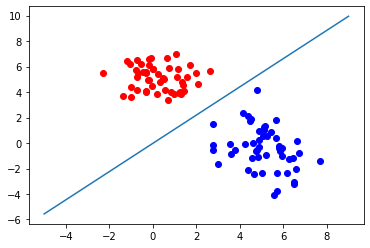

In [ ]:
x_2 = (-w[2] - w[0]*range(-5,10)) / w[1]

plt.scatter(class_1[:,0], class_1[:,1], color ='blue')
plt.scatter(class_0[:,0], class_0[:,1], color ='red')
plt.plot(range(-5,10), x_2);

## Part d)

In [ ]:
def fz_comp(pi, x, u, sigma):
  dif = x - u
  sigma_inv = np.linalg.inv(sigma)
  log_det_sigma = np.log(np.linalg.det(sigma))
  return  (-.5 * dif.T @ sigma_inv @ dif + np.log(pi) - .5 * log_det_sigma)

In [ ]:
X = np.vstack((class_0, class_1))
X_t = X.T
mu_1 = np.matrix(np.mean(class_1.T, axis = 1)).T
mu_0 = np.matrix(np.mean(class_0.T, axis = 1)).T
sigma_1 = np.cov(class_1.T)
sigma_0 = np.cov(class_0.T)
K_1 = len(class_1)
K_0 = len(class_0)
pi_1 = K_1 / (K_0 + K_1)
pi_0 = K_0 / (K_0 + K_1)

prediction = np.zeros(N)
for i in range(N):
  block = np.matrix(X[i,:]).T
  a = fz_comp(pi_1, block, mu_1, sigma_1)
  b = fz_comp(pi_0, block, mu_0, sigma_0)
  if (a[0][0] > b[0][0]):
    prediction[i] = 1

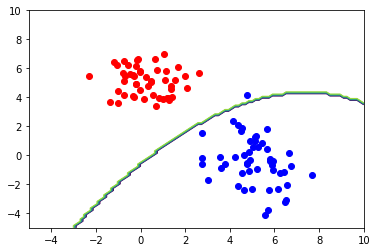

In [ ]:
n = 100
x = np.linspace(-5,10,n)
y = np.linspace(-5,10, n)
boundary = np.zeros((n,n))

for i in range(n):
  for j in range(n):
    block = np.matrix([x[i], y[j]]).T
    a = fz_comp(pi_1, block, mu_1, sigma_1) 
    b = fz_comp(pi_0, block, mu_0, sigma_0) 
    if (a[0][0] > b[0][0]):
      boundary[i,j] = 1
plt.scatter(class_1[:,0], class_1[:,1], color ='blue');
plt.scatter(class_0[:,0], class_0[:,1], color ='red');
plt.contour(x, y, boundary > 0, linewidths = 1);
plt.show()

# Exercise 4
## Part a)

In [ ]:
N = len(class_0) + len(class_1)
c = np.matrix(np.ones(N)).T
X = np.vstack((class_0, class_1))
X = np.hstack((X, c))
y_1 = np.ones(len(class_1))
y_0 = np.zeros(len(class_0))
y = np.append(y_0, y_1)
y = np.matrix(y).T
h = 1
K=np.zeros((N,N))
for i in range(N):
  for j in range(N):
    norm_term = np.power(np.linalg.norm(X[i,:]-X[j,:], 2),2)
    K[i,j]  = np.exp(-np.sum(norm_term/h))

In [ ]:
K[47:52,47:52]

array([[1.00000000e+00, 5.35715611e-06, 4.84149599e-04, 4.80194024e-14,
        3.78915001e-34],
       [5.35715611e-06, 1.00000000e+00, 6.14126673e-03, 6.17895744e-13,
        1.72368387e-28],
       [4.84149599e-04, 6.14126673e-03, 1.00000000e+00, 1.49787585e-05,
        1.92800938e-18],
       [4.80194024e-14, 6.17895744e-13, 1.49787585e-05, 1.00000000e+00,
        2.70414174e-05],
       [3.78915001e-34, 1.72368387e-28, 1.92800938e-18, 2.70414174e-05,
        1.00000000e+00]])

## Part b)
## Part c)

In [ ]:
lambd = 0.01
alpha = cvx.Variable((N,1))
loss = -cvx.sum(y.T @ K @ alpha) \
        + cvx.sum(cvx.log_sum_exp(cvx.hstack([np.zeros((N,1)), K @ alpha]), axis = 1))
reg = cvx.sum(cvx.quad_form(alpha, K))
prob = cvx.Problem(cvx.Minimize(loss / N + lambd * reg ))
prob.solve()
w2 = alpha.value
w2[0:2]

array([[-0.09361747],
       [-0.19132388]])

## Part d)

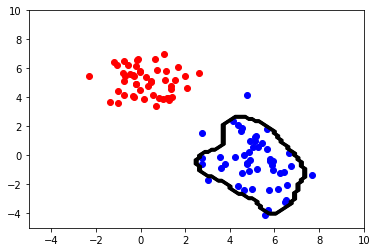

In [ ]:
xset = np.linspace(-5,10,n)
yset = np.linspace(-5,10, n)
output = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    data = repmat( np.array([xset[j], yset[i], 1]).reshape((1,3)), N, 1)
    phi  = np.exp( -np.sum(np.square(X-data), axis=1 )/h )
    output[i,j] = np.dot(phi.T, w2)

plt.scatter(class_1[:,0], class_1[:,1], color ='blue')
plt.scatter(class_0[:,0], class_0[:,1], color ='red')
plt.contour(xset, yset, output>0.5, linewidths=2, colors='k')
